In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/processed.csv')

In [3]:
df.head()

Unnamed: 0        id                                         address  \
0           0  42519694                        Leibeemd 10 5121SL Rijen   
1           1  42518143  Pallieterburg 40 2907CH Capelle aan den IJssel   
2           2  42518936      Paddestoelweg 5 2403HE Alphen aan den Rijn   
3           3  42518962        van Maerlantstraat 24 2741BE Waddinxveen   
4           4  42518733            Stadhoudersring 35 2713GA Zoetermeer   

   floor_area   price  property_area  rooms search_area  price_per_sqm  \
0         112  275000            205      5   rotterdam    2455.357143   
1         107  330000            114      5   rotterdam    3084.112150   
2         117  300000            115      5   rotterdam    2564.102564   
3         100  325000            195      4   rotterdam    3250.000000   
4         122  345000            133      5   rotterdam    2827.868852   

         lat       lon  
0  51.596798  4.918797  
1  51.952365  4.577271  
2  52.148824  4.679476  
3  52.054491  4.652947  
4  52.052030  4.481949

# Map plotting

In [4]:
import folium
from folium.plugins import HeatMap
import branca.colormap as cm

In [5]:
df = df.dropna()

In [6]:
max_price = df['price_per_sqm'].max()
min_price = df['price_per_sqm'].min()
price_1q = min_price + ((max_price - min_price) / 3)
price_3q = max_price - ((max_price - min_price) / 2)
colormap = cm.LinearColormap(colors=['blue','red'], vmin=min_price, vmax=max_price, index=[price_1q, price_3q])

In [10]:
m = folium.Map([51.9225687578312, 4.476496117743404], zoom_start=12)
for lat, lon, price in zip(df['lat'], df['lon'], df['price_per_sqm']):
    folium.CircleMarker([lat, lon], radius=2, fill=True, color=colormap(price), opacity=0.3, tooltip=round(price)).add_to(m)

m.add_child(colormap)
m

In [38]:
m = folium.Map([51.9225687578312, 4.476496117743404], zoom_start=12)
for lat, lon, price in zip(df['lat'], df['lon'], df['price_per_sqm']):
    folium.CircleMarker([lat, lon], radius=2, fill=True, opacity=0.3, color='black', tooltip=round(price)).add_to(m)
HeatMap(zip(df['lat'], df['lon'], df['price_per_sqm']), min_opacity=0.1, blur=5).add_to(m)
m

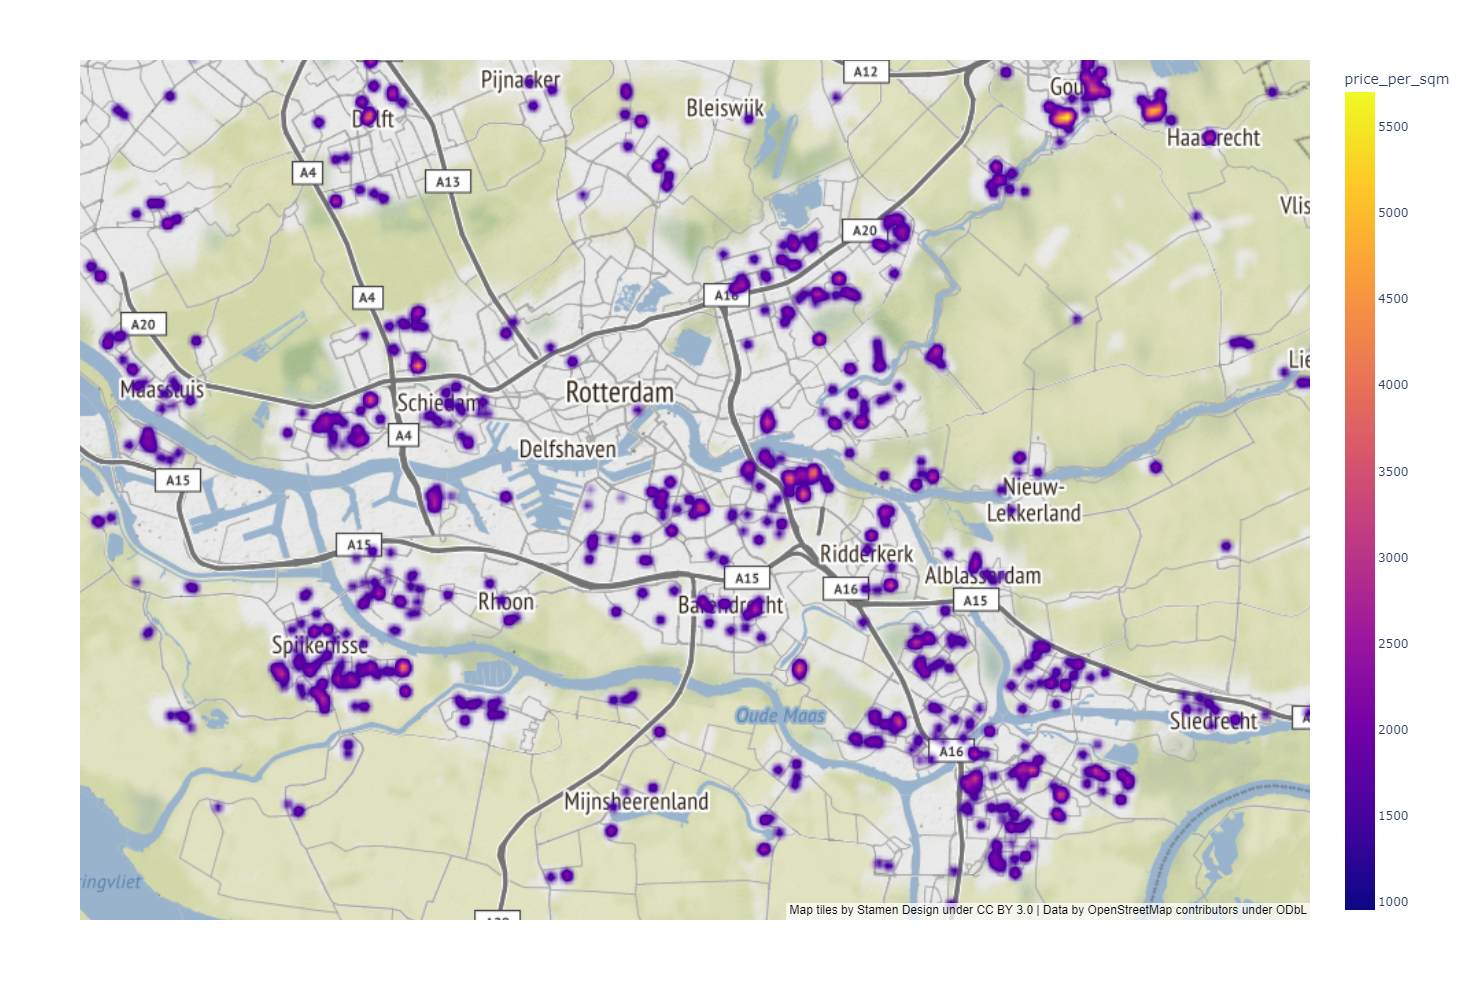

In [ ]:
import plotly.express as px
fig = px.density_mapbox(df[['lat', 'lon', 'price_per_sqm']], lat='lat', lon='lon', z='price_per_sqm', radius=10, zoom=9, mapbox_style='stamen-terrain', width=1200, height=1000)
fig